# League of Legends 데이터셋으로 다양체 학습하기

https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min

Context
League of Legends is a MOBA (multiplayer online battle arena) where 2 teams (blue and red) face off. There are 3 lanes, a jungle, and 5 roles. The goal is to take down the enemy Nexus to win the game.

Content
This dataset contains the first 10min. stats of approx. 10k ranked games (SOLO QUEUE) from a high ELO (DIAMOND I to MASTER). Players have roughly the same level.

Each game is unique. The gameId can help you to fetch more attributes from the Riot API.

There are 19 features per team (38 in total) collected after 10min in-game. This includes kills, deaths, gold, experience, level… It's up to you to do some feature engineering to get more insights.

The column blueWins is the target value (the value we are trying to predict). A value of 1 means the blue team has won. 0 otherwise.

So far I know, there is no missing value.

Glossary
Warding totem: An item that a player can put on the map to reveal the nearby area. Very useful for map/objectives control.
Minions: NPC that belong to both teams. They give gold when killed by players.
Jungle minions: NPC that belong to NO TEAM. They give gold and buffs when killed by players.
Elite monsters: Monsters with high hp/damage that give a massive bonus (gold/XP/stats) when killed by a team.
Dragons: Elite monster which gives team bonus when killed. The 4th dragon killed by a team gives a massive stats bonus. The 5th dragon (Elder Dragon) offers a huge advantage to the team.
Herald: Elite monster which gives stats bonus when killed by the player. It helps to push a lane and destroys structures.
Towers: Structures you have to destroy to reach the enemy Nexus. They give gold.
Level: Champion level. Start at 1. Max is 18.
Acknowledgements
Thanks, Rito Gaming.

## 데이터 불러오기

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

from sklearn import manifold
from sklearn import random_projection
from sklearn import datasets

In [6]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [7]:
lol_df = pd.read_csv('/content/drive/My Drive/kaggle/LeagueofLegends/high_diamond_ranked_10min.csv')
print(type(lol_df))
lol_df

<class 'pandas.core.frame.DataFrame'>


,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,0,0,17765,7.2,18967,211,69,2519,2469,21.1,1776.5,46,3,0,4,7,7,0,0,0,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,0,0,16238,7.2,19255,233,48,782,888,23.3,1623.8,12,21,1,4,6,3,0,0,0,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,0,0,15903,7.0,18032,210,45,-2416,-1877,21.0,1590.3,14,0,1,7,6,11,1,1,0,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,0,0,14459,6.6,17229,224,48,-839,-1085,22.4,1445.9,66,4,0,3,2,1,0,0,0,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [8]:
lol = lol_df.drop(['gameId'], axis=1)
lol

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1,17,2,1,7,4,5,1,1,0,0,17765,7.2,18967,211,69,2519,2469,21.1,1776.5,46,3,0,4,7,7,0,0,0,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,1,54,0,0,6,4,8,1,1,0,0,16238,7.2,19255,233,48,782,888,23.3,1623.8,12,21,1,4,6,3,0,0,0,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,0,23,1,0,6,7,5,0,0,0,0,15903,7.0,18032,210,45,-2416,-1877,21.0,1590.3,14,0,1,7,6,11,1,1,0,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,0,14,4,1,2,3,3,1,1,0,0,14459,6.6,17229,224,48,-839,-1085,22.4,1445.9,66,4,0,3,2,1,0,0,0,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [9]:
lol_X = lol.iloc[:,1:39]
lol_X

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,17,2,1,7,4,5,1,1,0,0,17765,7.2,18967,211,69,2519,2469,21.1,1776.5,46,3,0,4,7,7,0,0,0,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,54,0,0,6,4,8,1,1,0,0,16238,7.2,19255,233,48,782,888,23.3,1623.8,12,21,1,4,6,3,0,0,0,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,23,1,0,6,7,5,0,0,0,0,15903,7.0,18032,210,45,-2416,-1877,21.0,1590.3,14,0,1,7,6,11,1,1,0,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,14,4,1,2,3,3,1,1,0,0,14459,6.6,17229,224,48,-839,-1085,22.4,1445.9,66,4,0,3,2,1,0,0,0,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [10]:
lol_y = lol.loc[:,'blueWins']
lol_y

0       0
1       0
2       0
3       0
4       0
       ..
9874    1
9875    1
9876    0
9877    0
9878    1
Name: blueWins, Length: 9879, dtype: int64

## 시각화 함수 선언

In [11]:
s_curve, color = datasets.make_s_curve(1000, random_state=0)

In [12]:
lol, labels = lol_X, lol_y
rand_proj = random_projection.SparseRandomProjection(n_components=3, random_state=0)
projected_lol = rand_proj.fit_transform(lol)

In [13]:
def min_max_scale(x):
  min_value, max_value = np.min(x, 0), np.max(x, 0)
  x = (x - min_value) / (max_value - min_value)
  return x

In [14]:
def plot_s_curve(s_curve, color, position, projection):
  s_curve = min_max_scale(s_curve)
  if projection == '3d':
    ax = plt.subplot(position, projection=projection)
    ax.scatter(s_curve[:, 0], s_curve[:, 1], s_curve[:, 2], c=color, cmap=plt.cm.Spectral)
    ax.view_init(4, -72)
  elif projection == '2d':
    ax = plt.subplot(position)
    ax.scatter(s_curve[:, 0], s_curve[:, 1], c=color, cmap=plt.cm.Spectral)
    

In [15]:
def plot_lol(lol, labels, position, projection):
  lol = min_max_scale(lol)
  if projection == '3d':
    ax = plt.subplot(position, projection=projection)
    for i in range(lol.shape[0]):
      ax.text(lol[i, 0], lol[i, 1], lol[i, 2], str(labels[i]), 
              color=plt.cm.Set1(labels[i]), fontdict={'weight':'bold', 'size':9})
    ax.view_init(4, -72)
  elif projection == '2d':
    ax = plt.subplot(position)
    for i in range(lol.shape[0]):
      ax.text(lol[i, 0], lol[i, 1], str(labels[i]), 
              color=plt.cm.Set1(labels[i]), fontdict={'weight':'bold', 'size':9})


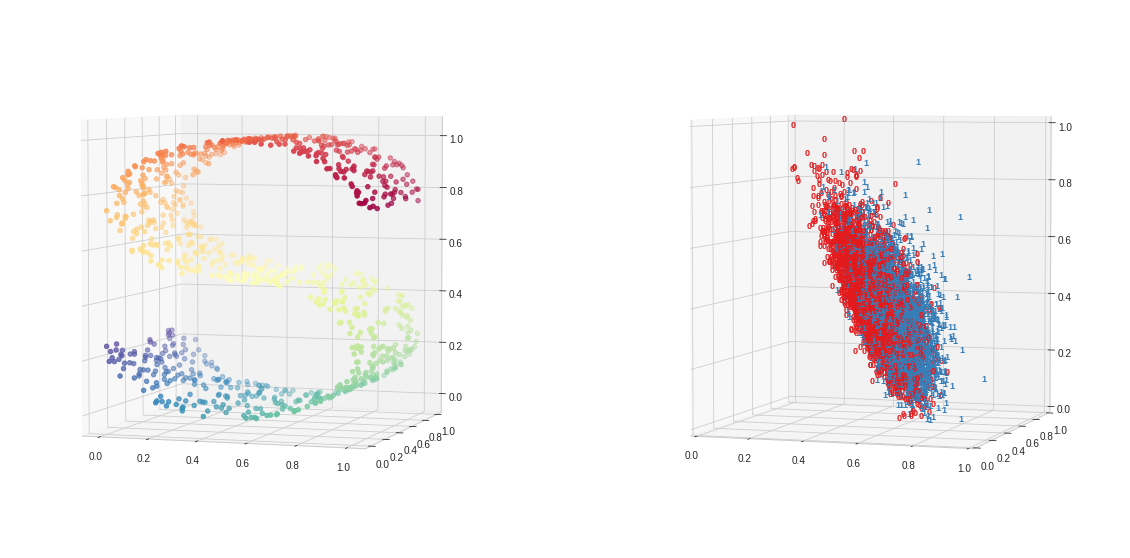

In [ ]:
fig = plt.figure(figsize=(20,10))
plot_s_curve(s_curve, color, 121, '3d')
plot_lol(projected_lol, labels, 122, '3d')

## Locally Linear Embedding (LLE)

* 국소 이웃 거리를 보존하는 저차원 임베딩을 찾음

In [ ]:
s_curve_lle = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2, method='standard', random_state=0).fit_transform(s_curve)
lol_lle = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=3, method='standard', random_state=0).fit_transform(lol)

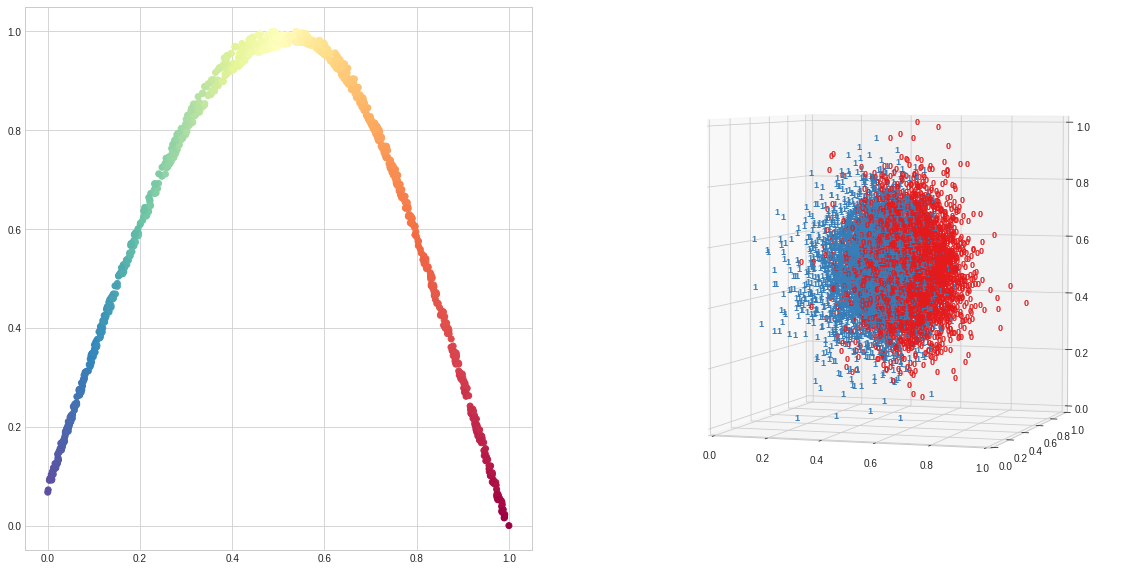

In [ ]:
fig = plt.figure(figsize=(20, 10))
plot_s_curve(s_curve_lle, color, 121, '2d')
plot_lol(lol_lle, labels, 122, '3d')

## Modified Locally Linear Embedding

* 각 이웃에 여러 가중치 벡터를 사용
* n_neighbors > n_components를 만족해야 함

In [18]:
s_curve_mlle = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2, method='modified', random_state=0).fit_transform(s_curve)
lol_mlle = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=3, method='modified', random_state=0).fit_transform(lol)

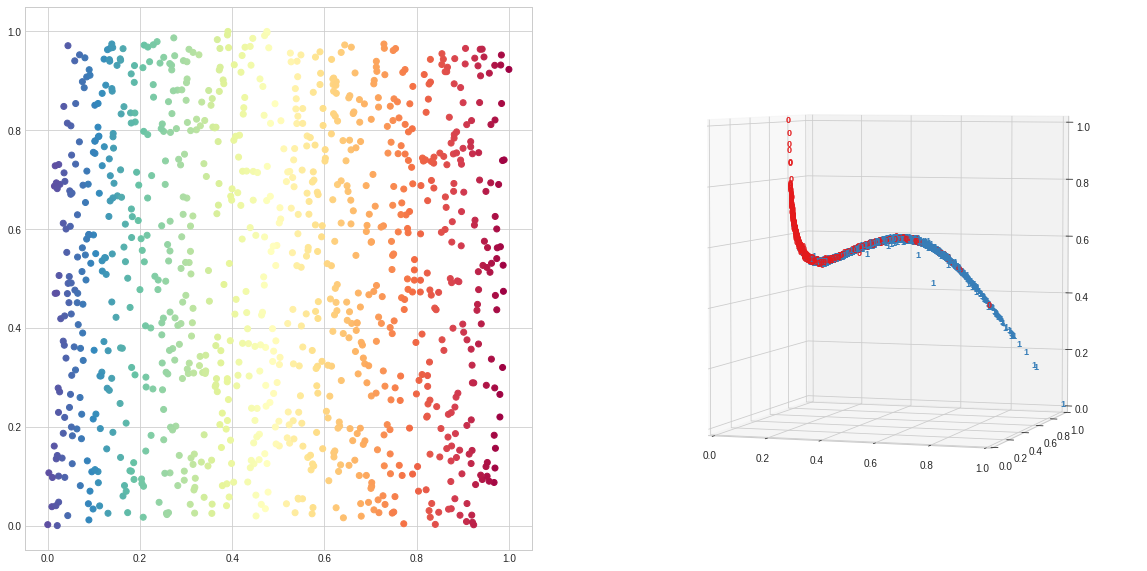

In [19]:
fig = plt.figure(figsize=(20, 10))
plot_s_curve(s_curve_mlle, color, 121, '2d')
plot_lol(lol_mlle, labels, 122, '3d')

## Isomap

* 초기의 다양체 학습 알고리즘
* MDS와 커널 PCA의 확장으로 볼 수 있음
* 모든 점들 사이의 측지 거리를 유지하는 저차원 임베딩을 찾음

In [21]:
s_curve_isomap = manifold.Isomap(n_neighbors=30, n_components=2).fit_transform(s_curve)
lol_isomap = manifold.Isomap(n_neighbors=30, n_components=3).fit_transform(lol)

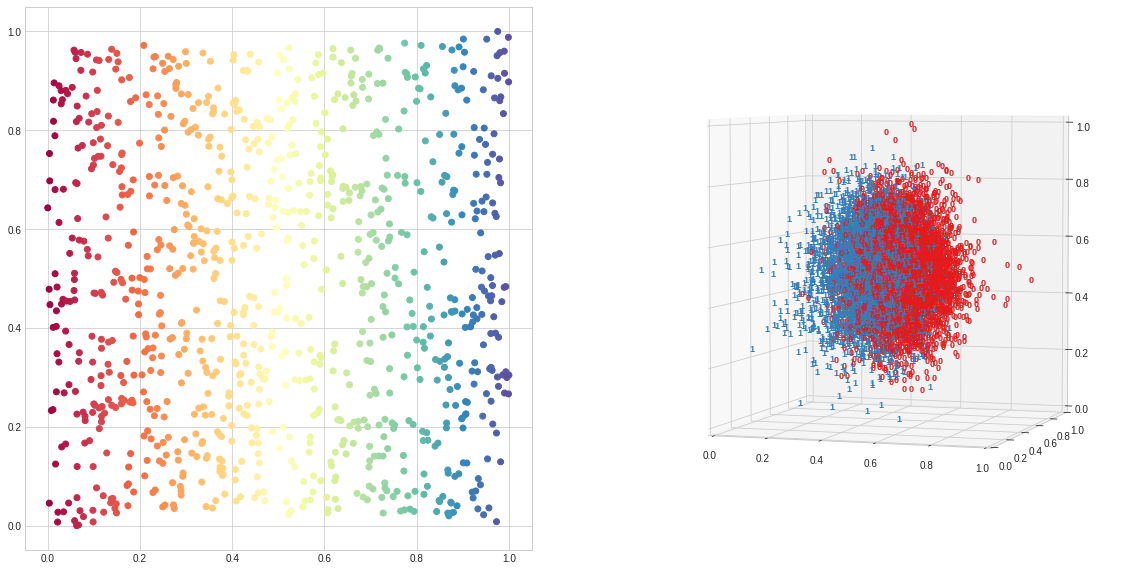

In [22]:
fig = plt.figure(figsize=(20, 10))
plot_s_curve(s_curve_isomap, color, 121, '2d')
plot_lol(lol_isomap, labels, 122, '3d')

## Spectral Embedding

* 스펙트럼 분해를 통해 데이터의 저차원 표현을 찾음
* 데이터의 점이 저차원 공간에서도 서로 가깝게 유지되도록 함

In [27]:
s_curve_se = manifold.SpectralEmbedding(n_components=2, random_state=0).fit_transform(s_curve)
lol_se = manifold.SpectralEmbedding(n_components=3, random_state=0).fit_transform(lol)

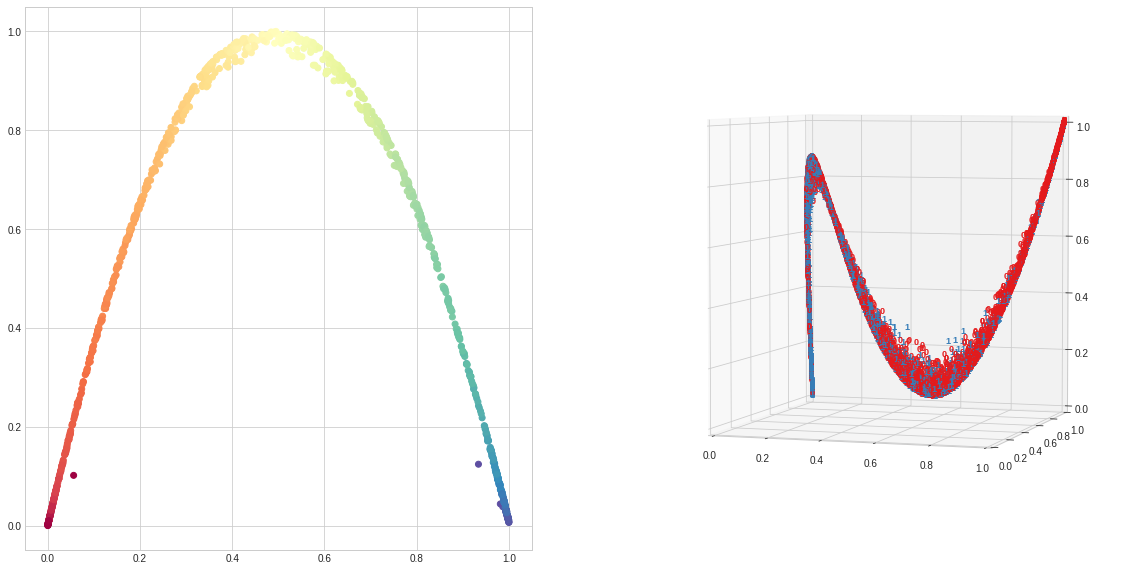

In [29]:
fig = plt.figure(figsize=(20, 10))
plot_s_curve(s_curve_se, color, 121, '2d')
plot_lol(lol_se, labels, 122, '3d')

## 정제된 표현을 이용한 학습
* 다양체 학습의 결과를 정제된 데이터로 생각할 수 있음
* 정제된 표현이기 때문에 분석에 비교적 용이함
* 기계학습 모델의 입력으로 사용했을때 성능향상을 기대할 수 있음

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [35]:
raw_lol, target = lol_X, lol_y

In [34]:
knn = KNeighborsClassifier()
svm = SVC()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

### 원본 데이터를 사용할 때

#### KNN

In [36]:
score = cross_val_score(
    estimator = knn,
    X = raw_lol, y=target,
    cv=5
)
score

array([0.69078947, 0.68066802, 0.69180162, 0.70040486, 0.6956962 ])

In [37]:
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score: 0.6918720340285963 (+/- 0.006544314563412326)


#### SVM

In [38]:
score = cross_val_score(
    estimator = svm,
    X = raw_lol, y=target,
    cv=5
)
score

array([0.73836032, 0.71761134, 0.7257085 , 0.73076923, 0.72607595])

In [39]:
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score: 0.7277050684159279 (+/- 0.0068036357888344055)


#### Decision Tree

In [40]:
score = cross_val_score(
    estimator = decision_tree,
    X = raw_lol, y=target,
    cv=5
)
score

array([0.62955466, 0.63309717, 0.62550607, 0.65182186, 0.62227848])

In [41]:
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score: 0.6324516476195357 (+/- 0.010351316835527044)


#### Random Forest

In [42]:
score = cross_val_score(
    estimator = random_forest,
    X = raw_lol, y=target,
    cv=5
)
score

array([0.7257085 , 0.7145749 , 0.7257085 , 0.72823887, 0.72455696])

In [43]:
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score: 0.7237575462512171 (+/- 0.004746678147183319)


### 정제된 데이터를 사용할 때

#### KNN

In [44]:
score = cross_val_score(
    estimator = knn,
    X = lol_mlle, y=target,
    cv=5
)
score

array([0.67611336, 0.67510121, 0.67965587, 0.69989879, 0.68455696])

In [45]:
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score: 0.6830652385589094 (+/- 0.009044021438970378)


#### SVM

In [46]:
score = cross_val_score(
    estimator = svm,
    X = lol_mlle, y=target,
    cv=5
)
score

array([0.73532389, 0.71356275, 0.72621457, 0.73076923, 0.7235443 ])

In [47]:
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score: 0.7258829498283197 (+/- 0.007353550417930419)


#### Decision Tree

In [48]:
score = cross_val_score(
    estimator = decision_tree,
    X = lol_mlle, y=target,
    cv=5
)
score

array([0.63815789, 0.62398785, 0.63157895, 0.64018219, 0.64151899])

In [49]:
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score: 0.635085173986573 (+/- 0.006515508136262865)


#### Random Forest

In [50]:
score = cross_val_score(
    estimator = random_forest,
    X = lol_mlle, y=target,
    cv=5
)
score

array([0.68522267, 0.65890688, 0.68016194, 0.68572874, 0.69620253])

In [51]:
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score: 0.6812445549121099 (+/- 0.012327352488021151)
